In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_policy = pd.read_csv('/content/Countrypolicy.csv')
df_policy.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,CPIA building human resources rating (1=low to...,IQ.CPA.HRES.XQ,..,2,2
1,Afghanistan,AFG,CPIA business regulatory environment rating (1...,IQ.CPA.BREG.XQ,..,2,2
2,Afghanistan,AFG,CPIA debt policy rating (1=low to 6=high),IQ.CPA.DEBT.XQ,..,1.5,1.5
3,Afghanistan,AFG,CPIA economic management cluster average (1=lo...,IQ.CPA.ECON.XQ,..,1.333333,1.166667
4,Afghanistan,AFG,CPIA efficiency of revenue mobilization rating...,IQ.CPA.REVN.XQ,..,2.5,2.5


In [6]:
df_policy.info()
# Count missing values in each column
missing_values = df_policy.isnull().sum()

missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1745 non-null   object
 1   Country Code   1743 non-null   object
 2   Series Name    1743 non-null   object
 3   Series Code    1743 non-null   object
 4   2021 [YR2021]  1743 non-null   object
 5   2022 [YR2022]  1743 non-null   object
 6   2023 [YR2023]  1743 non-null   object
dtypes: object(7)
memory usage: 95.7+ KB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021 [YR2021],5
2022 [YR2022],5
2023 [YR2023],5


In [7]:
rows_with_missing = df_policy[df_policy.isnull().any(axis=1)]
rows_with_missing

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1746,Data from database: Country Policy and Institu...,NaN,NaN,NaN,NaN,NaN,NaN
1747,Last Updated: 06/28/2024,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop rows with missing Country Name, Country Code, Series Name, or Series Code
df_policy_cleaned = df_policy.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])

# Confirm the shape after removal
df_policy_cleaned.shape

(1743, 7)

In [9]:
df_QPSD = pd.read_csv('/content/Quarterlypublicdebt.csv')
df_QPSD.head()

,Country Name,Country Code,Series Name,Series Code,2021Q1 [YR2021Q1],2021Q2 [YR2021Q2],2021Q3 [YR2021Q3],2021Q4 [YR2021Q4],2022Q1 [YR2022Q1],2022Q2 [YR2022Q2],2022Q3 [YR2022Q3],2022Q4 [YR2022Q4],2023Q1 [YR2023Q1],2023Q2 [YR2023Q2],2023Q3 [YR2023Q3],2023Q4 [YR2023Q4]
0,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.Z1,..,..,..,..,..,..,..,..,..,..,..,..
1,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC,..,..,..,..,..,..,..,..,..,..,..,..
2,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.CD,..,..,..,..,..,..,..,..,..,..,..,..
3,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC.Z1,..,..,..,..,..,..,..,..,..,..,..,..
4,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC,..,..,..,..,..,..,..,..,..,..,..,..


In [10]:
df_QPSD.info()
# Count missing values in each column
missing_values_QPSD = df_QPSD.isnull().sum()

missing_values_QPSD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59789 entries, 0 to 59788
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country Name       59786 non-null  object
 1   Country Code       59784 non-null  object
 2   Series Name        59784 non-null  object
 3   Series Code        59784 non-null  object
 4   2021Q1 [YR2021Q1]  59784 non-null  object
 5   2021Q2 [YR2021Q2]  59784 non-null  object
 6   2021Q3 [YR2021Q3]  59784 non-null  object
 7   2021Q4 [YR2021Q4]  59784 non-null  object
 8   2022Q1 [YR2022Q1]  59784 non-null  object
 9   2022Q2 [YR2022Q2]  59784 non-null  object
 10  2022Q3 [YR2022Q3]  59784 non-null  object
 11  2022Q4 [YR2022Q4]  59784 non-null  object
 12  2023Q1 [YR2023Q1]  59784 non-null  object
 13  2023Q2 [YR2023Q2]  59784 non-null  object
 14  2023Q3 [YR2023Q3]  59784 non-null  object
 15  2023Q4 [YR2023Q4]  59784 non-null  object
dtypes: object(16)
memory usage: 7.3+ MB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021Q1 [YR2021Q1],5
2021Q2 [YR2021Q2],5
2021Q3 [YR2021Q3],5
2021Q4 [YR2021Q4],5
2022Q1 [YR2022Q1],5
2022Q2 [YR2022Q2],5


In [11]:
rows_with_missing_QPSD = df_QPSD[df_QPSD.isnull().any(axis=1)]
rows_with_missing_QPSD

,Country Name,Country Code,Series Name,Series Code,2021Q1 [YR2021Q1],2021Q2 [YR2021Q2],2021Q3 [YR2021Q3],2021Q4 [YR2021Q4],2022Q1 [YR2022Q1],2022Q2 [YR2022Q2],2022Q3 [YR2022Q3],2022Q4 [YR2022Q4],2023Q1 [YR2023Q1],2023Q2 [YR2023Q2],2023Q3 [YR2023Q3],2023Q4 [YR2023Q4]
59784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59787,Data from database: Quarterly Public Sector Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59788,Last Updated: 04/23/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop rows with missing Country Name, Country Code, Series Name, or Series Code
df_QPSD_cleaned = df_QPSD.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])

# Confirm the shape after removal
df_QPSD_cleaned.shape

(59784, 16)

In [13]:
df_SPI = pd.read_csv('/content/Statisticalperformanceindicators.csv')
df_SPI.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Agriculture census (Availability score over 20...,SPI.D4.1.2.AGRI,0.5,0.5,0.5
1,Afghanistan,AFG,Agriculture survey (Availability score over 10...,SPI.D4.1.5.AGSVY,0.33,0.67,0.67
2,Afghanistan,AFG,Availability of Comparable Poverty headcount r...,SPI.D1.5.POV,0,0,0
3,Afghanistan,AFG,"Availability of Mortality rate, under-5 (per 1...",SPI.D1.5.CHLD.MORT,1,1,1
4,Afghanistan,AFG,Business process,SPI.D5.2.10.GSBP,0,0,0


In [14]:
df_SPI.info()
# Count missing values in each column
missing_values_SPI = df_SPI.isnull().sum()

missing_values_SPI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15629 entries, 0 to 15628
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   15626 non-null  object
 1   Country Code   15624 non-null  object
 2   Series Name    15624 non-null  object
 3   Series Code    15624 non-null  object
 4   2021 [YR2021]  15624 non-null  object
 5   2022 [YR2022]  15624 non-null  object
 6   2023 [YR2023]  15624 non-null  object
dtypes: object(7)
memory usage: 854.8+ KB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021 [YR2021],5
2022 [YR2022],5
2023 [YR2023],5


In [15]:
rows_with_missing_SPI = df_SPI[df_SPI.isnull().any(axis=1)]
rows_with_missing_SPI

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
15624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15627,Data from database: Statistical Performance In...,NaN,NaN,NaN,NaN,NaN,NaN
15628,Last Updated: 11/11/2024,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Drop rows with missing Country Name, Country Code, Series Name, or Series Code
df_SPI_cleaned = df_SPI.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])

# Confirm the shape after removal
df_SPI_cleaned.shape

(15624, 7)

In [17]:
df_WDI = pd.read_csv('/content/Worlddevelopmentindicators.csv')
df_WDI.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..
1,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,..,..,..
2,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,..,..,..
3,Bermuda,BMU,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100
4,Bermuda,BMU,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,100,100,100


In [18]:
df_WDI.info()
# Count missing values in each column
missing_values_WDI = df_WDI.isnull().sum()

missing_values_WDI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243954 entries, 0 to 243953
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Country Name   243954 non-null  object
 1   Country Code   243954 non-null  object
 2   Series Name    243954 non-null  object
 3   Series Code    243953 non-null  object
 4   2021 [YR2021]  243953 non-null  object
 5   2022 [YR2022]  243953 non-null  object
 6   2023 [YR2023]  243953 non-null  object
dtypes: object(7)
memory usage: 13.0+ MB


,0
Country Name,0
Country Code,0
Series Name,0
Series Code,1
2021 [YR2021],1
2022 [YR2022],1
2023 [YR2023],1


In [19]:
rows_with_missing_WDI = df_WDI[df_WDI.isnull().any(axis=1)]
rows_with_missing_WDI

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
243953,North Macedonia,MKD,Out-of-pocket expenditu,NaN,NaN,NaN,NaN


In [20]:
# Drop rows with missing Country Name, Country Code, Series Name, or Series Code
df_WDI_cleaned = df_WDI.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])

# Confirm the shape after removal
df_WDI_cleaned.shape

(243953, 7)

In [21]:
# First, replace '..' with NaN so it is properly handled
df_policy_cleaned.replace('..', pd.NA, inplace=True)
df_SPI_cleaned.replace('..', pd.NA, inplace=True)
df_WDI_cleaned.replace('..', pd.NA, inplace=True)
df_QPSD_cleaned.replace('..', pd.NA, inplace=True)

<ipython-input-21-50a5e2408c2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_policy_cleaned.replace('..', pd.NA, inplace=True)
<ipython-input-21-50a5e2408c2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPI_cleaned.replace('..', pd.NA, inplace=True)
<ipython-input-21-50a5e2408c2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WDI_cleaned.replace('..', pd.NA, inplace=True)
<ipython-input-21-50a5e2408c2f>:5: SettingW

In [22]:
# Melt the dataframe to convert from wide to long format
df_policy_melted = pd.melt(
    df_policy_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
    var_name='Year',
    value_name='Value'
)

# Extract just the year number from the 'Year' column
df_policy_melted['Year'] = df_policy_melted['Year'].str.extract(r'(\d{4})').astype(int)
df_policy_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,CPIA building human resources rating (1=low to...,IQ.CPA.HRES.XQ,2021,<NA>
1,Afghanistan,AFG,CPIA business regulatory environment rating (1...,IQ.CPA.BREG.XQ,2021,<NA>
2,Afghanistan,AFG,CPIA debt policy rating (1=low to 6=high),IQ.CPA.DEBT.XQ,2021,<NA>
3,Afghanistan,AFG,CPIA economic management cluster average (1=lo...,IQ.CPA.ECON.XQ,2021,<NA>
4,Afghanistan,AFG,CPIA efficiency of revenue mobilization rating...,IQ.CPA.REVN.XQ,2021,<NA>


In [23]:
# Melt the dataframe to convert from wide to long format
df_SPI_melted = pd.melt(
    df_SPI_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
    var_name='Year',
    value_name='Value'
)

# Extract just the year number from the 'Year' column
df_SPI_melted['Year'] = df_SPI_melted['Year'].str.extract(r'(\d{4})').astype(int)
df_SPI_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Agriculture census (Availability score over 20...,SPI.D4.1.2.AGRI,2021,0.5
1,Afghanistan,AFG,Agriculture survey (Availability score over 10...,SPI.D4.1.5.AGSVY,2021,0.33
2,Afghanistan,AFG,Availability of Comparable Poverty headcount r...,SPI.D1.5.POV,2021,0
3,Afghanistan,AFG,"Availability of Mortality rate, under-5 (per 1...",SPI.D1.5.CHLD.MORT,2021,1
4,Afghanistan,AFG,Business process,SPI.D5.2.10.GSBP,2021,0


In [24]:
# Melt the dataframe to convert from wide to long format
df_WDI_melted = pd.melt(
    df_WDI_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
    var_name='Year',
    value_name='Value'
)

# Extract just the year number from the 'Year' column
df_WDI_melted['Year'] = df_WDI_melted['Year'].str.extract(r'(\d{4})').astype(int)
df_WDI_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2021,<NA>
1,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,2021,<NA>
2,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,2021,<NA>
3,Bermuda,BMU,Access to electricity (% of population),EG.ELC.ACCS.ZS,2021,100
4,Bermuda,BMU,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2021,100


In [25]:
# First, identify all quarterly columns
quarterly_cols = [col for col in df_QPSD_cleaned.columns if 'YR20' in col and 'Q' in col]

# Melt the dataframe to convert from wide to long format
df_QPSD_melted = pd.melt(
    df_QPSD_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars = quarterly_cols,
    var_name='Quarter',
    value_name='Value'
)

# Extract year and quarter into separate columns
df_QPSD_melted['Quarter_Formatted'] = df_QPSD_melted['Quarter'].str.extract(r'(20\d{2}Q[1-4])')
df_QPSD_melted['Year'] = df_QPSD_melted['Quarter_Formatted'].str[:4].astype(int)
df_QPSD_melted['Quarter'] = df_QPSD_melted['Quarter_Formatted'].str[-2:]

# Clean up and convert values
df_QPSD_melted['Value'] = pd.to_numeric(df_QPSD_melted['Value'].replace('..', pd.NA), errors='coerce')
df_QPSD_melted.drop(columns='Quarter_Formatted', inplace=True)
df_QPSD_melted.head()

,Country Name,Country Code,Series Name,Series Code,Quarter,Value,Year
0,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.Z1,Q1,NaN,2021
1,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC,Q1,NaN,2021
2,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.CD,Q1,NaN,2021
3,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC.Z1,Q1,NaN,2021
4,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC,Q1,NaN,2021


In [26]:
# Check missing values in the reshaped quarterly dataframe
missing_values_QPSD= df_QPSD_melted.isnull().sum()

missing_values_QPSD

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Quarter,0
Value,528861
Year,0


In [27]:
df_QPSD_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717408 entries, 0 to 717407
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country Name  717408 non-null  object 
 1   Country Code  717408 non-null  object 
 2   Series Name   717408 non-null  object 
 3   Series Code   717408 non-null  object 
 4   Quarter       717408 non-null  object 
 5   Value         188547 non-null  float64
 6   Year          717408 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 38.3+ MB


In [28]:
df_QPSD_melted.shape

(717408, 7)

In [29]:
# First, check if the following four datasets exist
dataset_names = ['df_policy_melted', 'df_QPSD_melted', 'df_WDI_melted', 'df_SPI_melted']
existing_datasets = {name: name in globals() for name in dataset_names}

existing_datasets

{'df_policy_melted': True,
 'df_QPSD_melted': True,
 'df_WDI_melted': True,
 'df_SPI_melted': True}

In [30]:
# Get unique country names from each dataset
#countries_policy = set(df_policy_melted['Country Name'].dropna().unique())
countries_qpsd = set(df_QPSD_melted['Country Name'].dropna().unique())
countries_wdi = set(df_WDI_melted['Country Name'].dropna().unique())
countries_spi = set(df_SPI_melted['Country Name'].dropna().unique())

# Find countries common to all four datasets
common_countries_all = countries_qpsd & countries_wdi & countries_spi

# Display the count and a sorted list of common countries
len(common_countries_all), sorted(common_countries_all)

(76,
 ['Albania',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Bangladesh',
  'Barbados',
  'Belgium',
  'Bolivia',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'Bulgaria',
  'Burkina Faso',
  'Cambodia',
  'Canada',
  'Chile',
  'China',
  'Colombia',
  'Congo, Dem. Rep.',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Dominican Republic',
  'El Salvador',
  'Estonia',
  'Fiji',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Greece',
  'Guatemala',
  'Honduras',
  'Hungary',
  'Iceland',
  'Indonesia',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Kazakhstan',
  'Kenya',
  'Korea, Rep.',
  'Kosovo',
  'Kyrgyz Republic',
  'Latvia',
  'Lebanon',
  'Lesotho',
  'Lithuania',
  'Luxembourg',
  'Madagascar',
  'Malawi',
  'Malaysia',
  'Maldives',
  'Malta',
  'Mauritius',
  'Mexico',
  'Moldova',
  'Mongolia',
  'Morocco',
  'Nepal',
  'Netherlands',
  'New Zealand',
  'Nicaragua',
  'Nigeria',
  'North Macedoni

In [31]:
# Filter each dataset using the list of common countries
df_QPSD_filtered = df_QPSD_melted[df_QPSD_melted['Country Name'].isin(common_countries_all)]
df_WDI_filtered = df_WDI_melted[df_WDI_melted['Country Name'].isin(common_countries_all)]
df_SPI_filtered = df_SPI_melted[df_SPI_melted['Country Name'].isin(common_countries_all)]

# Check shape of filtered datasets
filtered_shapes = {
    'QPSD': df_QPSD_filtered.shape,
    'WDI': df_WDI_filtered.shape,
    'SPI': df_SPI_filtered.shape
}

filtered_shapes


{'QPSD': (514368, 7), 'WDI': (342537, 6), 'SPI': (16416, 6)}

In [32]:
df_QPSD_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Quarter,0
Value,374108
Year,0


In [33]:
df_WDI_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Year,0
Value,157566


In [34]:
df_SPI_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Year,0
Value,172


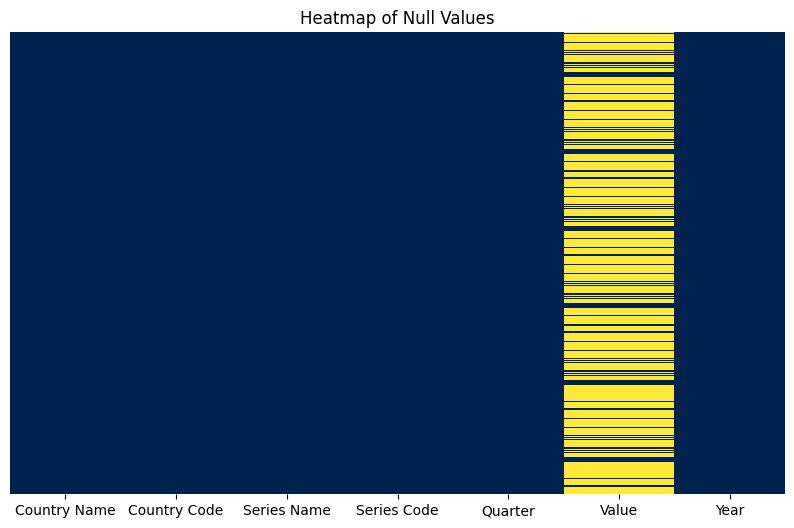

In [35]:
# Set the dataframe you want to visualize
df_QPSD_heat = df_QPSD_filtered  # or df_WDI_filtered / df_SPI_filtered

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_QPSD_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

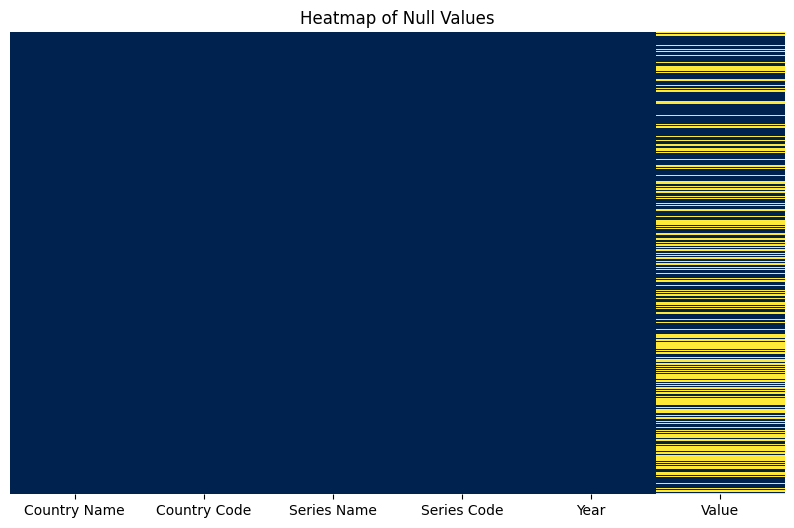

In [36]:
# Set the dataframe you want to visualize
df_WDI_heat = df_WDI_filtered  # or df_WDI_filtered / df_SPI_filtered

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_WDI_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


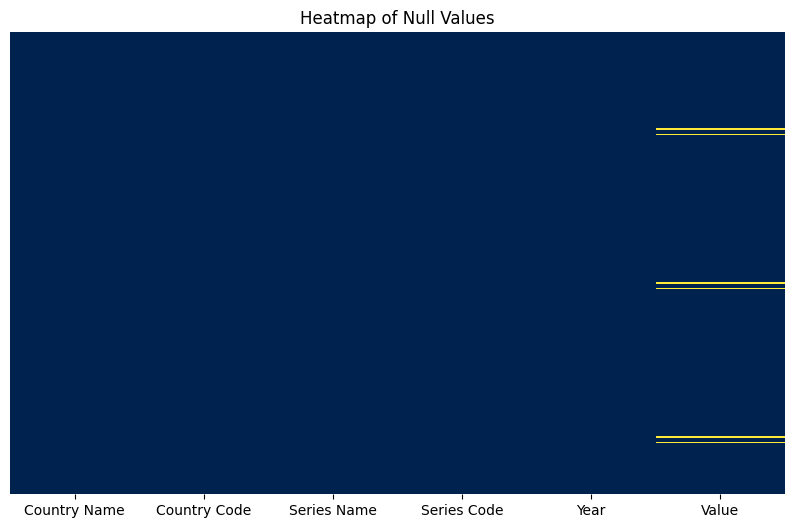

In [37]:
# Set the dataframe you want to visualize
df_SPI_heat = df_SPI_filtered  # or df_WDI_filtered / df_SPI_filtered

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_SPI_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


In [38]:
# Add source labels
df_QPSD_filtered['Source'] = 'QPSD'
df_WDI_filtered['Source'] = 'WDI'
df_SPI_filtered['Source'] = 'SPI'

# Combine them into one dataset
df_combined = pd.concat([df_QPSD_filtered, df_WDI_filtered, df_SPI_filtered], ignore_index=True)

# Preview the result
df_combined.head()
df_combined.to_csv("/content/Combined_Indicators_Data.csv", index=False)

<ipython-input-38-52db26a77abd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_QPSD_filtered['Source'] = 'QPSD'
<ipython-input-38-52db26a77abd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WDI_filtered['Source'] = 'WDI'
<ipython-input-38-52db26a77abd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [39]:
df_combined.shape

(873321, 8)

In [40]:
df_combined.dtypes

,0
Country Name,object
Country Code,object
Series Name,object
Series Code,object
Quarter,object
Value,object
Year,int64
Source,object


In [41]:
df_combined['Value'] = pd.to_numeric(df_combined['Value'], errors='coerce')

In [42]:
df_combined.dtypes

,0
Country Name,object
Country Code,object
Series Name,object
Series Code,object
Quarter,object
Value,float64
Year,int64
Source,object


In [43]:
df_combined['Value'] = pd.to_numeric(df_combined['Value'], errors='coerce')
df_combined['Value'].describe()

,Value
count,3.414750e+05
mean,1.593797e+13
std,3.134674e+14
min,-5.382066e+14
25%,3.500000e+00
50%,6.044145e+01
75%,3.299782e+09
max,2.089238e+16


In [46]:
# Get unique series names from df_combined
unique_series = df_combined['Series Name'].dropna().unique()
df_unique_series = pd.DataFrame(sorted(unique_series), columns=["Series Name"])


In [47]:
# Get mapping of Series Name to Source(s)
series_sources = df_combined[['Series Name', 'Source']].dropna().drop_duplicates()

# Aggregate multiple sources per series into a single string (e.g., "WDI, SPI")
series_sources_agg = series_sources.groupby('Series Name')['Source'].agg(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Merge with your unique series DataFrame
df_unique_series_with_source = df_unique_series.merge(series_sources_agg, on='Series Name', how='left')

# Rename column for clarity
df_unique_series_with_source.rename(columns={'Source': 'Source File(s)'}, inplace=True)

df_unique_series_with_source.head()


,Series Name,Source File(s)
0,ARI treatment (% of children under 5 taken to ...,WDI
1,Access to clean fuels and technologies for coo...,WDI
2,Access to clean fuels and technologies for coo...,WDI
3,Access to clean fuels and technologies for coo...,WDI
4,Access to electricity (% of population),WDI


In [48]:
df_unique_series_with_source.to_csv("Unique_Series_List.csv", index=False)

In [49]:
import pandas as pd

# Load each category CSV to extract its Series Names
categories_files = {
    'Economical_Indicators': '/content/Economical_Indicators.csv',
    'Environmental_Indicators': '/content/Environmental_Indicators.csv',
    'Financial_Indicators': '/content/Financial_Indicators.csv',
    'Public_Debt_Indicators': '/content/Public_Debt_Indicators.csv',
    'Social_Indicators': '/content/Social_Indicators.csv',
    'Statistical_Indicators': '/content/Statistical_Indicators.csv',
    'Uncategorized': '/content/Uncategorized.csv'
}

# Create a mapping from Series Name to Category
series_to_category = {}

for category, filepath in categories_files.items():
    df = pd.read_csv(filepath)
    for series_name in df['Series Name'].dropna().unique():
        series_to_category[series_name] = category

# Apply the mapping to df_combined
df_combined['Indicator Category'] = df_combined['Series Name'].map(series_to_category)

# Check how many series were matched and how many remain unmatched
matched_count = df_combined['Indicator Category'].notna().sum()
unmatched_count = df_combined['Indicator Category'].isna().sum()

matched_count, unmatched_count


<ipython-input-49-57c43febf7e6>:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


(np.int64(873321), np.int64(0))

In [50]:
# Define a base output path
base_path = "/content/"

# Initialize a dictionary to track saved file paths
saved_files = {}

# Loop through each unique category and save a CSV
for category in df_combined['Indicator Category'].dropna().unique():
    category_df = df_combined[df_combined['Indicator Category'] == category]
    filename = f"{category}.csv"
    file_path = base_path + filename
    category_df.to_csv(file_path, index=False)
    saved_files[category] = file_path

saved_files


{'Financial_Indicators': '/content/Financial_Indicators.csv',
 'Economical_Indicators': '/content/Economical_Indicators.csv',
 'Public_Debt_Indicators': '/content/Public_Debt_Indicators.csv',
 'Environmental_Indicators': '/content/Environmental_Indicators.csv',
 'Social_Indicators': '/content/Social_Indicators.csv',
 'Statistical_Indicators': '/content/Statistical_Indicators.csv',
 'Uncategorized': '/content/Uncategorized.csv'}

In [51]:
df_economical=pd.read_csv('/content/Economical_Indicators.csv')
df_environmental=pd.read_csv('/content/Environmental_Indicators.csv')
df_financial=pd.read_csv('/content/Financial_Indicators.csv')
df_publicdebt=pd.read_csv('/content/Public_Debt_Indicators.csv')
df_social=pd.read_csv('/content/Social_Indicators.csv')
df_statistical=pd.read_csv('/content/Statistical_Indicators.csv')
df_uncategorized=pd.read_csv('/content/Uncategorized.csv')

<ipython-input-51-ca6d55ca9771>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_economical=pd.read_csv('/content/Economical_Indicators.csv')


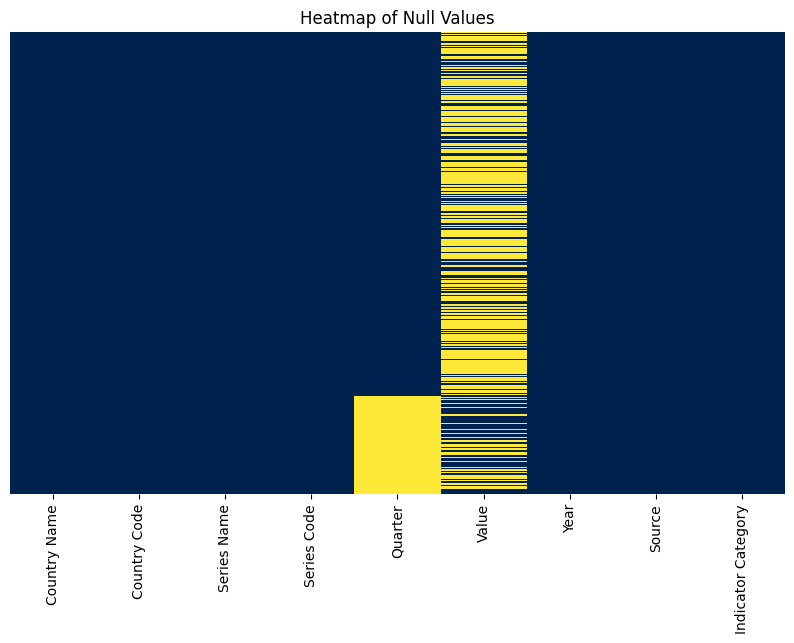

In [52]:
# Set the dataframe you want to visualize
df_economical_heat = df_economical

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_economical_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


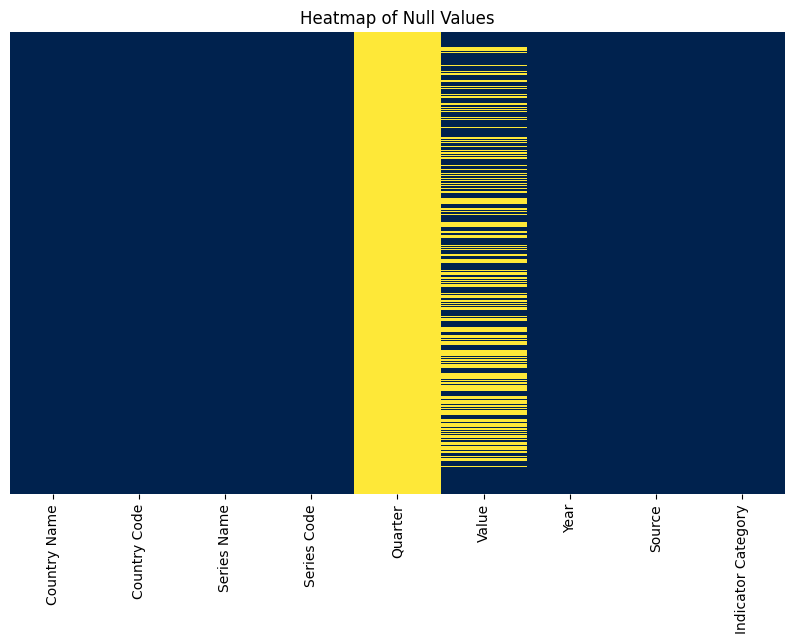

In [53]:
# Set the dataframe you want to visualize
df_environmental_heat = df_environmental

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_environmental_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


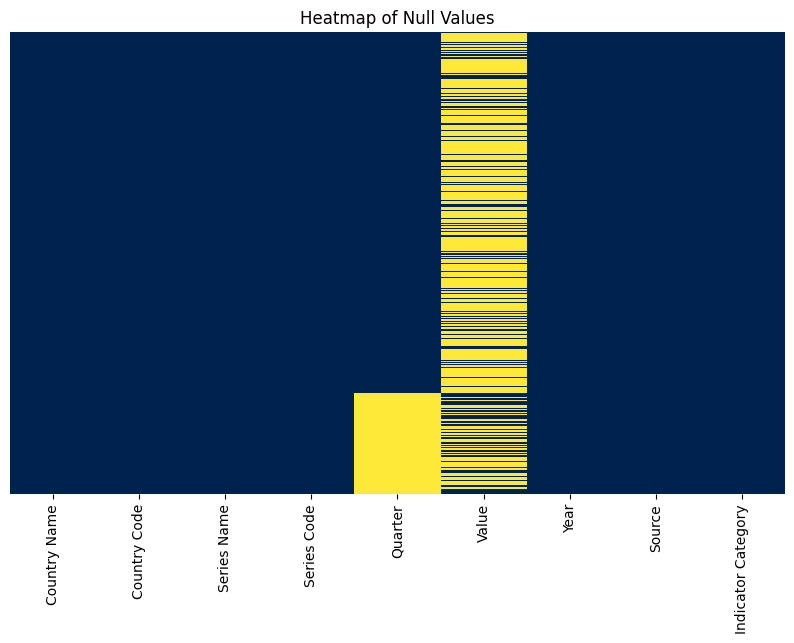

In [54]:
# Set the dataframe you want to visualize
df_financial_heat = df_financial

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_financial_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


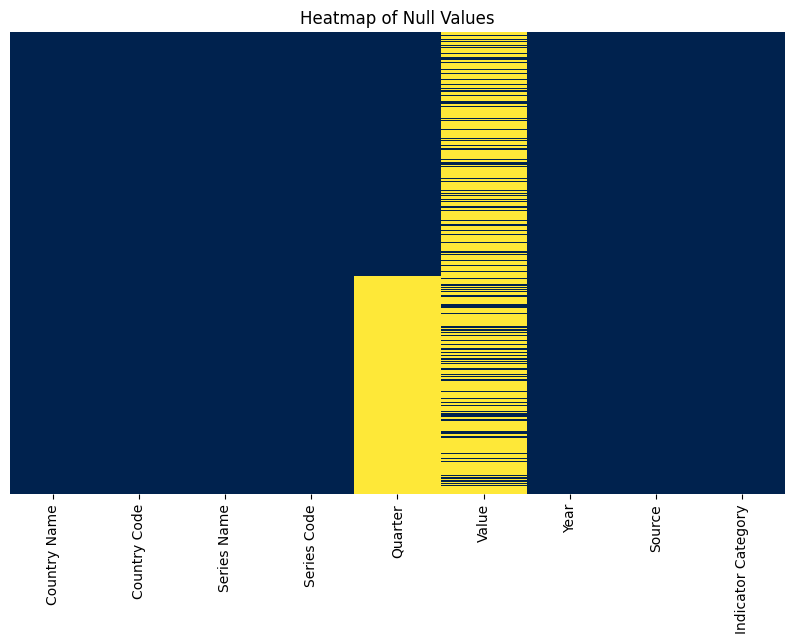

In [55]:
# Set the dataframe you want to visualize
df_publicdebt_heat = df_publicdebt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_publicdebt_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


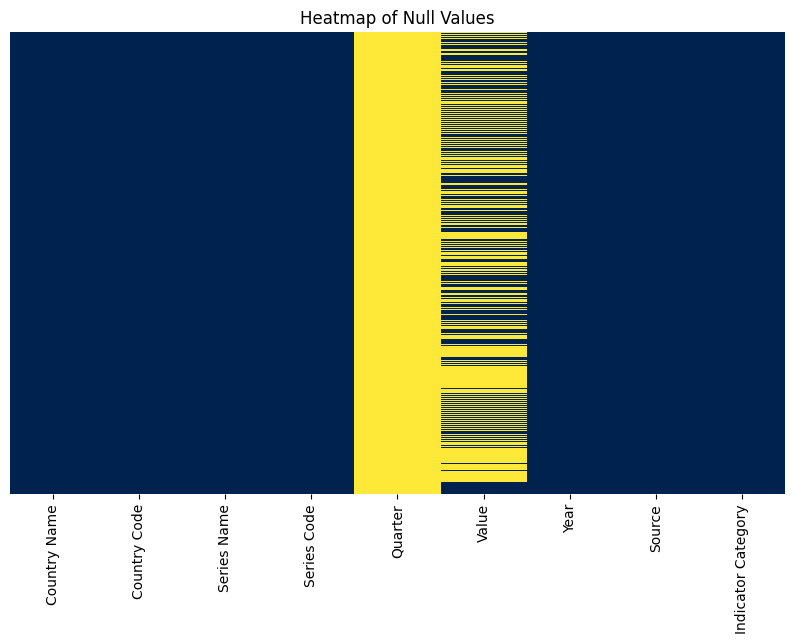

In [56]:
# Set the dataframe you want to visualize
df_social_heat = df_social

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_social_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

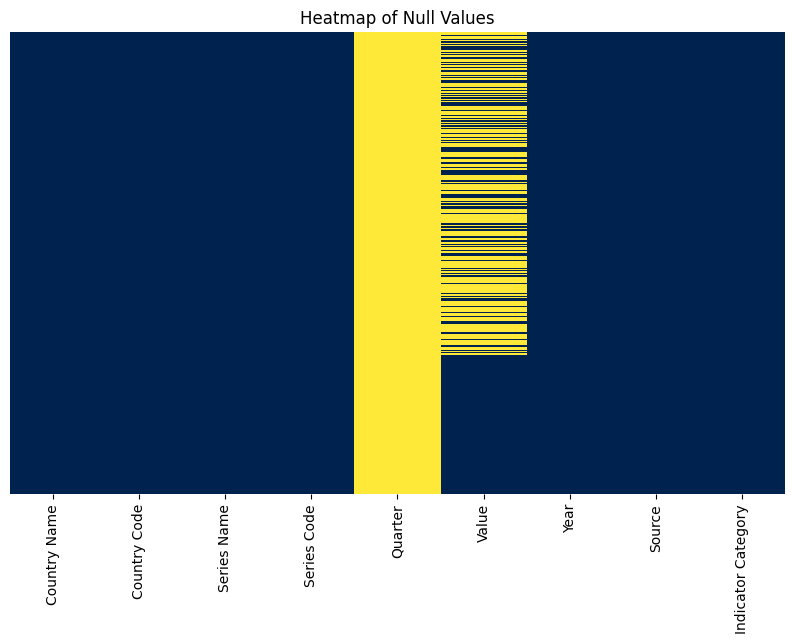

In [57]:
# Set the dataframe you want to visualize
df_statistical_heat = df_statistical

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_statistical_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

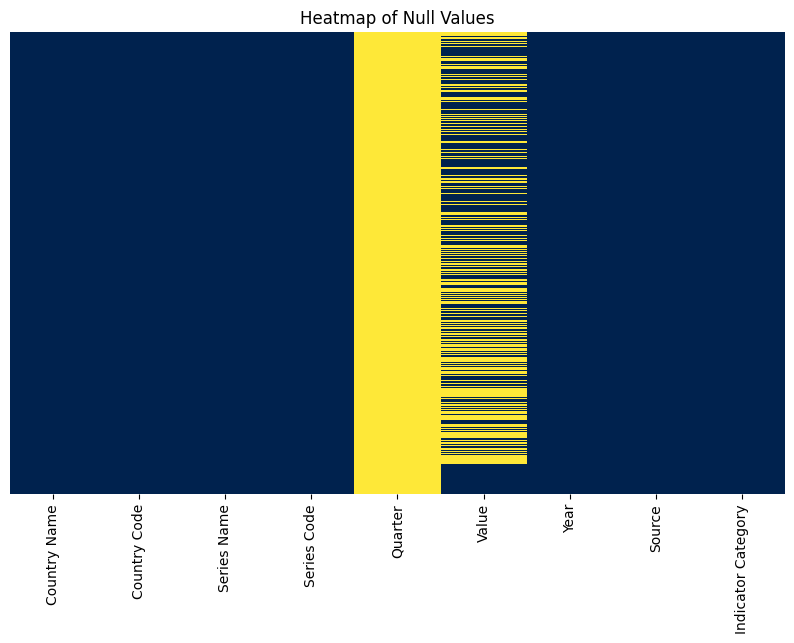

In [58]:
# Set the dataframe you want to visualize
df_uncategorized_heat = df_uncategorized

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_uncategorized_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

In [59]:
# The count of missing values in each column
missing_values = df_economical.isnull().sum()
print(missing_values)
df_economical.shape

Country Name               0
Country Code               0
Series Name                0
Series Code                0
Quarter                95715
Value                 282467
Year                       0
Source                     0
Indicator Category         0
dtype: int64


(453219, 9)

In [60]:
df_economical['Quarter'] = df_economical['Quarter'].fillna('Annual')

In [61]:
# The count of missing values in each column
missing_values = df_economical.isnull().sum()
print(missing_values)
df_economical.shape

Country Name               0
Country Code               0
Series Name                0
Series Code                0
Quarter                    0
Value                 282467
Year                       0
Source                     0
Indicator Category         0
dtype: int64


(453219, 9)

In [62]:
df_economical.groupby('Series Name')['Value'].apply(lambda x: x.isna().mean()).sort_values(ascending=False).head(10)


,Value
Series Name,
B-READY: Business Location Pillar 1: Quality of Regulations for Business Location,1.0
B-READY: Business Insolvency Pillar 1: Quality of Regulations for Judicial Insolvency Proceedings,1.0
B-READY: Business Entry Pillar 2: Digital Public Services and Transparency of Information for Business Entry,1.0
B-READY: Business Entry Pillar 1: Quality of Regulations for Business Entry,1.0
"B-READY: International Trade Pillar 3: Efficiency of Importing Goods, Exporting Goods, and Engaging in Digital Trade",1.0
B-READY: International Trade: Overall Score,1.0
B-READY: Pillar 2: Public Services,1.0
B-READY: Labor Pillar 2: Adequacy of Public Services for Labor,1.0
B-READY: Business Location Pillar 2: Quality of Public Services and Transparency of Information for Business Location,1.0


In [ ]:
country_counts = df_economical.groupby('Country Name').size().sort_values(ascending=False)
print(country_counts.head(10))


In [63]:
country_avg = df_economical.groupby('Country Name')['Value'].mean().sort_values(ascending=False)
print(country_avg.head(20))


Country Name
Indonesia           8.380311e+14
Korea, Rep.         1.143926e+14
Colombia            8.738634e+13
Japan               7.873578e+13
Lebanon             3.416649e+13
Paraguay            1.953764e+13
Chile               1.606244e+13
Cambodia            1.150439e+13
Nigeria             6.877785e+12
Argentina           6.801794e+12
Congo, Dem. Rep.    6.212692e+12
China               6.094517e+12
United States       5.561944e+12
Hungary             5.182120e+12
Mongolia            3.855370e+12
Cote d'Ivoire       3.798765e+12
Madagascar          3.792021e+12
Costa Rica          3.239003e+12
Kazakhstan          2.452194e+12
Bangladesh          1.685684e+12
Name: Value, dtype: float64


In [64]:
missing_summary = df_economical.groupby('Country Name')['Value'].apply(
    lambda x: f"{x.notna().sum()} present / {x.isna().sum()} missing"
)
print(missing_summary.head(106))


Country Name
Albania          2722 present / 3245 missing
Argentina        1462 present / 4505 missing
Armenia          1876 present / 4091 missing
Australia        3595 present / 2372 missing
Austria          2957 present / 3010 missing
                            ...             
Peru             3014 present / 2953 missing
St. Lucia        2861 present / 3106 missing
Suriname         1268 present / 4699 missing
United States    2269 present / 3698 missing
Uruguay          1803 present / 4164 missing
Name: Value, Length: 76, dtype: object


In [65]:
# Calculate missing percentage per country
missing_percentage = df_economical.groupby('Country Name')['Value'].apply(
    lambda x: x.isna().mean() * 100
).sort_values(ascending=False)

# Convert to DataFrame for export and display
df_missing_percentage = missing_percentage.reset_index()
df_missing_percentage.columns = ['Country Name', 'Missing Value Percentage']
pd.set_option('display.max_rows', None)  # Show all rows in the notebook
df_missing_percentage

,Country Name,Missing Value Percentage
0,Malawi,89.240825
1,Nigeria,89.106754
2,Bolivia,85.721468
3,Maldives,83.643372
4,Cambodia,81.632311
5,"Congo, Dem. Rep.",81.280375
6,Burkina Faso,81.012234
7,Lebanon,80.526228
8,Madagascar,80.442433
9,Barbados,79.839115


In [66]:
country_code = 'USA'

# Filter the dataset for the specified country
country_data = df_economical[df_economical['Country Code'] == country_code]

# Calculate the percentage of missing values in the 'Value' column
missing_percentage = country_data['Value'].isna().mean() * 100

print(f"Missing Value Percentage for {country_code}: {missing_percentage:.2f}%")


Missing Value Percentage for USA: 61.97%


In [67]:
missing_summary_combined = df_combined.groupby('Country Name')['Value'].apply(
    lambda x: f"{x.notna().sum()} present / {x.isna().sum()} missing"
)
print(missing_summary_combined.head(106))

# Calculate missing percentage per country
missing_percentage_combined = df_combined.groupby('Country Name')['Value'].apply(
    lambda x: x.isna().mean() * 100
).sort_values(ascending=False)

# Convert to DataFrame for export and display
df_missing_percentage_combined = missing_percentage_combined.reset_index()
df_missing_percentage_combined.columns = ['Country Name', 'Missing Value Percentage']
pd.set_option('display.max_rows', None)  # Show all rows in the notebook
df_missing_percentage_combined

Country Name
Albania                   5200 present / 6311 missing
Argentina                 3475 present / 8036 missing
Armenia                   4355 present / 7156 missing
Australia                 6450 present / 5061 missing
Austria                   5103 present / 6408 missing
Bangladesh                6449 present / 5062 missing
Barbados                  2783 present / 8728 missing
Belgium                   4137 present / 7374 missing
Bolivia                   2814 present / 8697 missing
Bosnia and Herzegovina    5003 present / 6508 missing
Botswana                  3319 present / 8192 missing
Brazil                    5009 present / 6502 missing
Bulgaria                  4186 present / 7325 missing
Burkina Faso              3271 present / 8240 missing
Cambodia                  3093 present / 8418 missing
Canada                    4292 present / 7219 missing
Chile                     3236 present / 8275 missing
China                     3081 present / 8430 missing
Colombia       

,Country Name,Missing Value Percentage
0,Malawi,80.331856
1,Nigeria,78.855008
2,Maldives,76.639736
3,Barbados,75.823126
4,Bolivia,75.553818
5,Lebanon,74.580836
6,"Congo, Dem. Rep.",74.459213
7,Suriname,73.486231
8,China,73.234298
9,Cambodia,73.130050


In [68]:
missing_by_year = df_combined.groupby('Year')['Value'].apply(lambda x: x.isna().mean() * 100)
missing_by_year = missing_by_year.reset_index()
missing_by_year.columns = ['Year', 'Missing Value Percentage']

print(missing_by_year)

   Year  Missing Value Percentage
0  2021                 56.997942
1  2022                 60.086497
2  2023                 65.613331


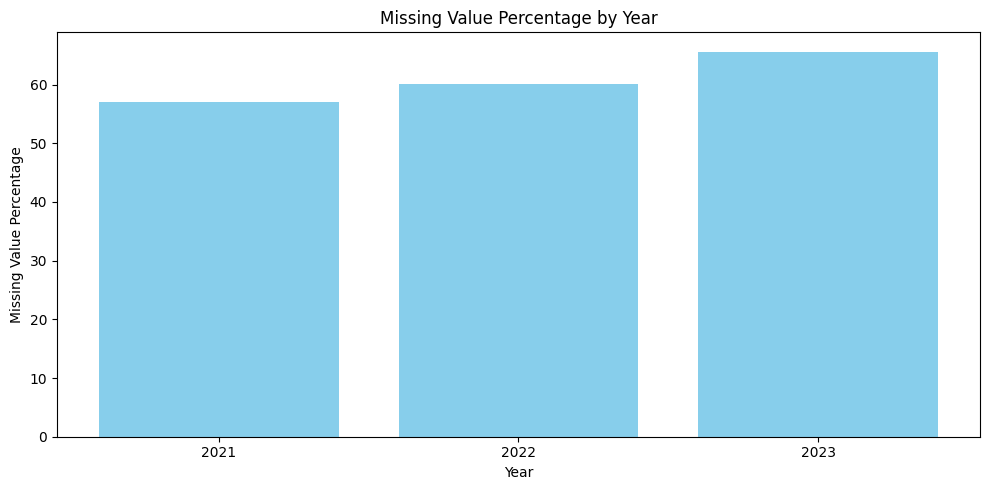

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(missing_by_year['Year'], missing_by_year['Missing Value Percentage'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Missing Value Percentage')
plt.title('Missing Value Percentage by Year')
plt.xticks(missing_by_year['Year'])  # Ensure all years are labeled
plt.tight_layout()
plt.show()

In [70]:
missing_by_source = df_combined.groupby('Source')['Value'].apply(lambda x: x.isna().mean() * 100)
missing_by_source = missing_by_source.reset_index()
missing_by_source.columns = ['Source', 'Missing Value Percentage']

print(missing_by_source)


  Source  Missing Value Percentage
0   QPSD                 72.731585
1    SPI                  1.047758
2    WDI                 45.999702


In [72]:
least_20_countries = df_missing_percentage_combined.sort_values(by='Missing Value Percentage').head(20)['Country Name']
df_combined_least20 = df_combined[df_combined['Country Name'].isin(least_20_countries)]
print(df_combined_least20['Country Name'].value_counts())

Country Name
Albania               11511
Australia             11511
Bangladesh            11511
Colombia              11511
Costa Rica            11511
Dominican Republic    11511
El Salvador           11511
Georgia               11511
Guatemala             11511
Honduras              11511
Indonesia             11511
Ireland               11511
Kazakhstan            11511
Kenya                 11511
Lithuania             11511
Mauritius             11511
Mexico                11511
Moldova               11511
Netherlands           11511
Peru                  11511
Name: count, dtype: int64


In [75]:
!pip install pycountry

import plotly.express as px

# Use your existing missing value percentage DataFrame
# Ensure it has ISO 3-letter codes for countries (e.g., 'USA', 'IND', 'CAN')
# If not already there, we can map from names to ISO codes using pycountry

# OPTIONAL: If you don't already have country codes
import pycountry

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df_missing_percentage_combined['Country Code'] = df_missing_percentage_combined['Country Name'].apply(get_country_code)

# Drop rows with missing codes
df_map = df_missing_percentage_combined.dropna(subset=['Country Code'])

# Create the choropleth
fig = px.choropleth(
    df_map,
    locations='Country Code',
    color='Missing Value Percentage',
    hover_name='Country Name',
    color_continuous_scale='Reds',
    title='Missing Value Percentage by Country (All Indicators)',
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [78]:
# Group by Country Name and calculate missing percentage
missing_percentage_least20 = df_combined_least20.groupby('Country Name')['Value'].apply(
    lambda x: x.isna().mean() * 100
).sort_values()

# Convert to DataFrame for display
df_missing_percentage_least20 = missing_percentage_least20.reset_index()
df_missing_percentage_least20.columns = ['Country Name', 'Missing Value Percentage']

# Display the result
df_missing_percentage_least20


,Country Name,Missing Value Percentage
0,Indonesia,23.264703
1,El Salvador,25.332291
2,Honduras,32.777343
3,Mexico,38.502302
4,Georgia,38.919295
5,Colombia,42.819911
6,Australia,43.966641
7,Bangladesh,43.975328
8,Mauritius,44.010077
9,Costa Rica,44.965685


In [79]:
domain_groups = df_combined.groupby('Indicator Category')

<Axes: >

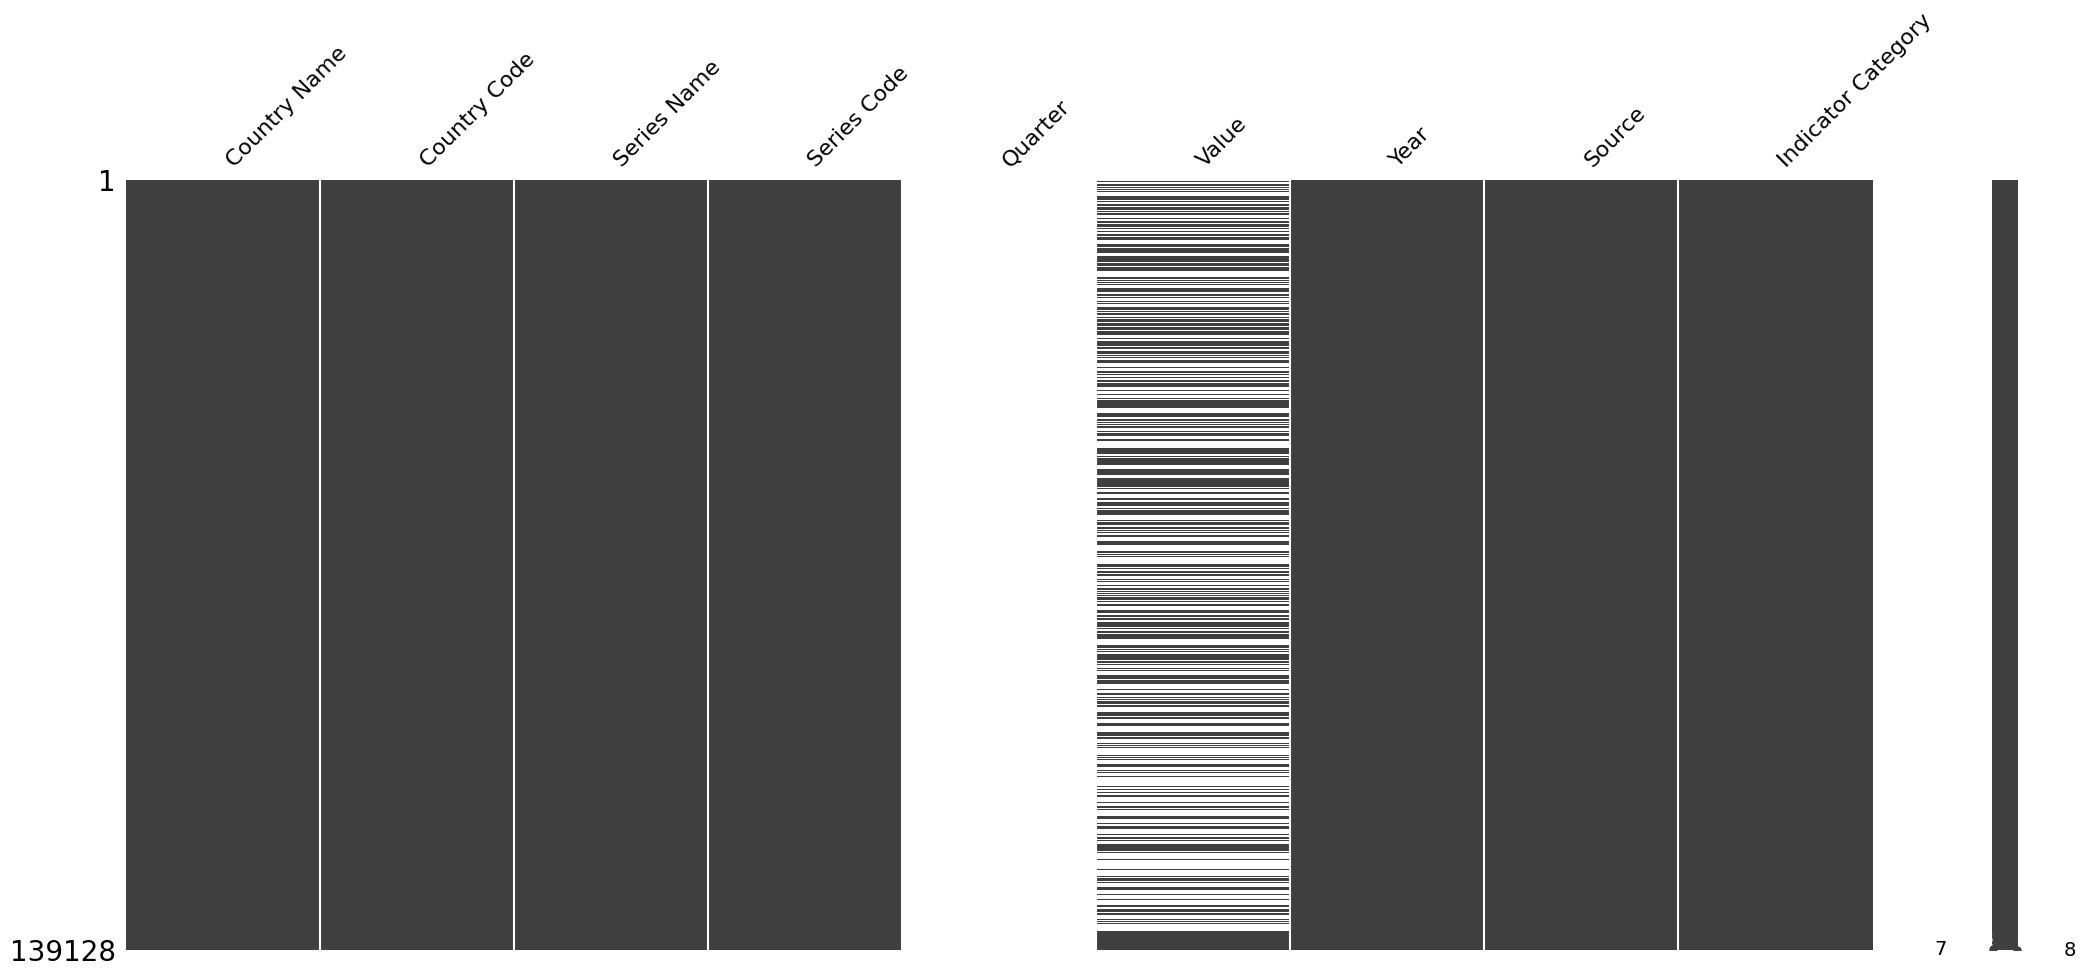

In [81]:
import missingno as msno
msno.matrix(df_combined[df_combined['Indicator Category'] == 'Social_Indicators'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
